<h1>Importing Libraries</h1>

In [1]:
import datetime
from binance.client import Client
import pandas as pd
import numpy as np  # to handle matrix
from matplotlib import pyplot as plt # to visualize
from sklearn.model_selection import train_test_split # Split data
from sklearn.ensemble import RandomForestRegressor # Random Forest Classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.svm import SVR # SVM Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.linear_model import Ridge #Ridge Regression
from sklearn.preprocessing import MinMaxScaler #Min max scaler
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sb
import math  

<h1>Fetching and preprocessing Data</h1>

In [2]:
client = Client('V8pWnZx7QeJIRx6VoGnEnSRy0S8FLxEqMX82H512IucYzW7jC5xOvRbmuCAnpYfQ','zjbChzSdCiHx5VNTLZ3UbX3mI2MVvmCVRxlPjdTwRyUrzZEYTTdQ8isnX3Pa6A87')

In [3]:
BTC = client.get_historical_klines(symbol='BTCUSDT',interval=Client.KLINE_INTERVAL_1HOUR,start_str="1 year ago UTC")
ETH = client.get_historical_klines(symbol='ETHUSDT',interval=Client.KLINE_INTERVAL_1HOUR,start_str="1 year ago UTC")
XRP = client.get_historical_klines(symbol='XRPUSDT',interval=Client.KLINE_INTERVAL_1HOUR,start_str="1 year ago UTC")
TRON = client.get_historical_klines(symbol='TRXUSDT',interval=Client.KLINE_INTERVAL_1HOUR,start_str="1 year ago UTC")
LTC = client.get_historical_klines(symbol='LTCUSDT',interval=Client.KLINE_INTERVAL_1HOUR,start_str="1 year ago UTC")

In [38]:
#-----------------------------------BTC---------------------------------------------------#
BTC=pd.DataFrame(BTC, columns = ['Date','BTC','a','b','c','d','e','f','g','h','i','j'])
BTC.drop(['a','b','c','d','e','f','g','h','i','j'], axis=1, inplace=True)
BTC['Date']=pd.to_datetime(BTC['Date'],unit='ms')
#----------------------------------ETH----------------------------------------------------#
ETH=pd.DataFrame(ETH, columns = ['Date','ETH','a','b','c','d','e','f','g','h','i','j'])
ETH.drop(['a','b','c','d','e','f','g','h','i','j'], axis=1, inplace=True)
ETH['Date']=pd.to_datetime(ETH['Date'],unit='ms')
#----------------------------------XRP-----------------------------------------------------#
XRP=pd.DataFrame(XRP, columns = ['Date','XRP','a','b','c','d','e','f','g','h','i','j'])
XRP.drop(['a','b','c','d','e','f','g','h','i','j'], axis=1, inplace=True)
XRP['Date']=pd.to_datetime(XRP['Date'],unit='ms')
#----------------------------------TRON----------------------------------------------------#
TRON=pd.DataFrame(TRON, columns = ['Date','TRON','a','b','c','d','e','f','g','h','i','j'])
TRON.drop(['a','b','c','d','e','f','g','h','i','j'], axis=1, inplace=True)
TRON['Date']=pd.to_datetime(TRON['Date'],unit='ms')
#----------------------------------LTC----------------------------------------------------#
LTC=pd.DataFrame(LTC, columns = ['Date','LTC','a','b','c','d','e','f','g','h','i','j'])
LTC.drop(['a','b','c','d','e','f','g','h','i','j'], axis=1, inplace=True)
LTC['Date']=pd.to_datetime(LTC['Date'],unit='ms')

In [39]:
data=pd.merge(BTC, ETH, on='Date', how='inner')
data=pd.merge(data, XRP, on='Date', how='inner')
data=pd.merge(data, TRON, on='Date', how='inner')
data=pd.merge(data, LTC, on='Date', how='inner')
data['ETH'] = data['ETH'].astype(float)
data['XRP'] = data['XRP'].astype(float)
data['BTC'] = data['BTC'].astype(float)
data['TRON'] = data['TRON'].astype(float)
data['LTC'] = data['LTC'].astype(float)
print(data.isnull().sum())
test = data[6000:len(data)] # USed to verify our hypothesis with LR
data = data[0:6000] #Used for correlation Pearson 1v2
print("Test :",test.shape)
print("Data :",data.shape)
#print(test)

Date    0
BTC     0
ETH     0
XRP     0
TRON    0
LTC     0
dtype: int64
Test : (2726, 6)
Data : (6000, 6)


<h1>Pearsons Coefficient</h1>

In [6]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr1, _ = pearsonr(data['BTC'],data['ETH'])
print('Pearsons correlation BTC ETH: %.3f' % corr1)
corr2, _ = pearsonr(data['BTC'],data['XRP'])
print('Pearsons correlation BTC XRP: %.3f' % corr2)
corr3, _ = pearsonr(data['BTC'],data['TRON'])
print('Pearsons correlation BTC TRON: %.3f' % corr3)
corr4, _ = pearsonr(data['BTC'],data['LTC'])
print('Pearsons correlation BTC LTC: %.3f' % corr4)

data.corr()

Pearsons correlation BTC ETH: 0.968
Pearsons correlation BTC XRP: 0.646
Pearsons correlation BTC TRON: 0.582
Pearsons correlation BTC LTC: 0.810


,BTC,ETH,XRP,TRON,LTC
BTC,1.000000,0.968475,0.645665,0.581843,0.809867
ETH,0.968475,1.000000,0.668756,0.663495,0.807356
XRP,0.645665,0.668756,1.000000,0.131875,0.199106
TRON,0.581843,0.663495,0.131875,1.000000,0.738602
LTC,0.809867,0.807356,0.199106,0.738602,1.000000


<h1>Spearmans Coefficient</h1>

In [7]:
from scipy.stats import spearmanr
# calculate Spearman's correlation
corr1, _ = spearmanr(data['BTC'],data['ETH'])
print('Spearmans correlation BTC ETH: %.3f' % corr1)
corr2, _ = spearmanr(data['BTC'],data['XRP'])
print('Spearmans correlation BTC XRP: %.3f' % corr2)
corr3, _ = spearmanr(data['BTC'],data['TRON'])
print('Spearmans correlation BTC TRON: %.3f' % corr3)
corr4, _ = spearmanr(data['BTC'],data['LTC'])
print('Spearmans correlation BTC LTC: %.3f' % corr4)

Spearmans correlation BTC ETH: 0.944
Spearmans correlation BTC XRP: 0.655
Spearmans correlation BTC TRON: 0.409
Spearmans correlation BTC LTC: 0.800


<h1>Plotting Graphs</h1>

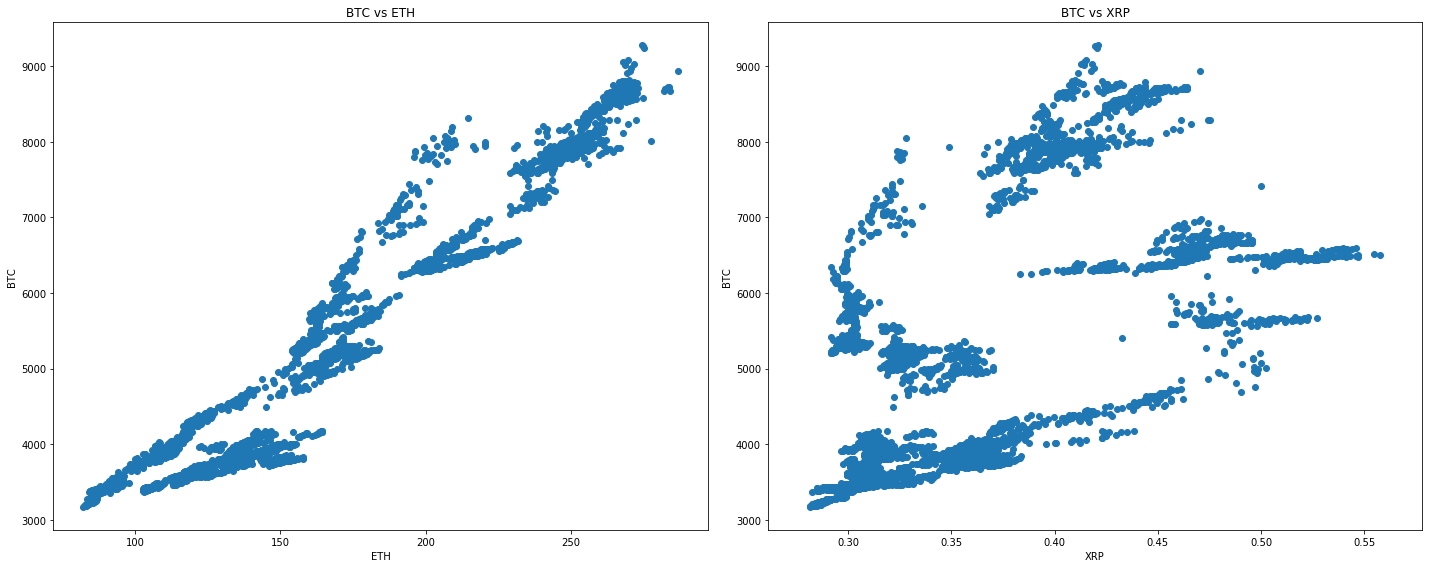

In [8]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['ETH'],data['BTC'])
plt.title('BTC vs ETH')
plt.ylabel('BTC')
plt.xlabel('ETH') 

plt.subplot(1, 2, 2)
plt.scatter(data['XRP'],data['BTC'])
plt.title('BTC vs XRP')
plt.ylabel('BTC')
plt.xlabel('XRP') 

plt.tight_layout()
plt.show()

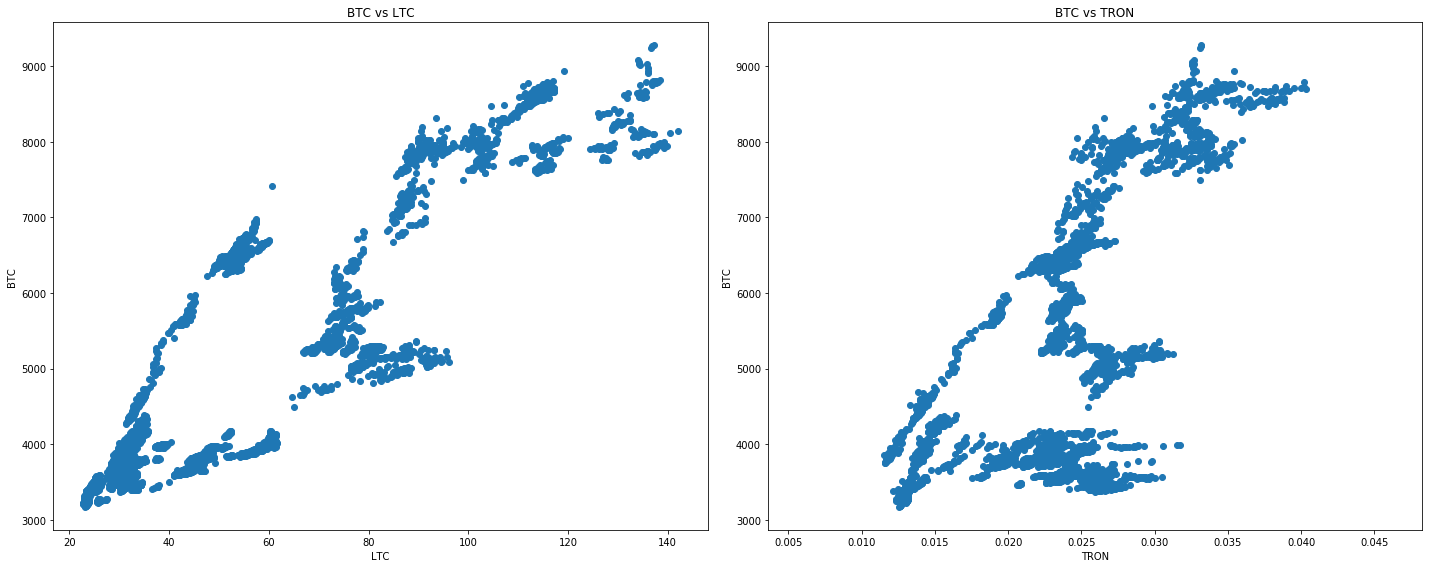

In [9]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['LTC'],data['BTC'])
plt.title('BTC vs LTC')
plt.ylabel('BTC')
plt.xlabel('LTC')

plt.subplot(1, 2, 2)
plt.scatter(data['TRON'],data['BTC'])
plt.title('BTC vs TRON')
plt.ylabel('BTC')
plt.xlabel('TRON') 

plt.tight_layout()
plt.show()

<h1>Now Using Multiple Correlation</h1>

In [40]:
arr = ["BTC","ETH","XRP","TRON","LTC"]
mat = data.corr()

#PEARSON
#Here a = Rxz b = Ryz c = Rxy
#Not using r-adjusted as the number of parameters has no bearing on our correlation

def relation(a,b,c):
    R = a*a + b*b - 2*a*b*c
    R = R/(1-c*c)
    return round(math.sqrt(R),3)   

#For 1v2 analysis
for i in range(1,5):
    for j in range(i+1,5):
        print("BTC vs ("+arr[i]+" and "+arr[j]+") is :",relation(mat.iat[0,i],mat.iat[0,j],mat.iat[i,j]))

BTC vs (ETH and XRP) is : 0.968
BTC vs (ETH and TRON) is : 0.972
BTC vs (ETH and LTC) is : 0.97
BTC vs (XRP and TRON) is : 0.817
BTC vs (XRP and LTC) is : 0.949
BTC vs (TRON and LTC) is : 0.81


<h1>Linear Regression</h1>

581649.87
0.54


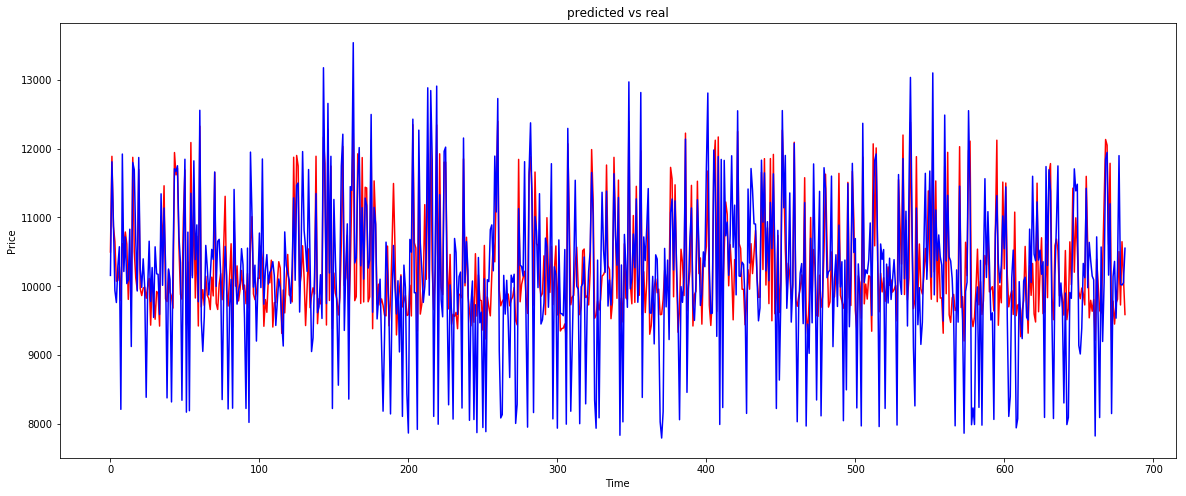

In [41]:
#We know that BTC vs ETH and XRP will give best accuracy
#test.pop('ETH')
test.pop('TRON')
test.pop('LTC')
#test.pop('XRP')
y=test.pop('BTC')
test.pop('Date')
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.25, random_state=0)
modelLR=LinearRegression()
modelLR.fit(X_train,y_train)
#---------------Accuracy-------------------#
y_compare=modelLR.predict(X_test)
rmse = mean_squared_error(y_test, y_compare)
r2 = r2_score(y_test,y_compare)
print(round(rmse,2))
print(round(r2,2))
#--------------Graph-----------------------#
plt.figure(figsize=(20,8))
plt.plot(y_compare,color='red',label='predicted price')
plt.plot(y_test,color='blue',label='real price')
plt.title('predicted vs real')
plt.ylabel('Price')
plt.xlabel('Time')
plt.show()